# 06. Обучение с учителем

# Прогнозирование оттока клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Нам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Построим модель с предельно большим значением *F1*-меры. 

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Логистическая-регрессия-(без-учета-дисбаланса-классов)" data-toc-modified-id="Логистическая-регрессия-(без-учета-дисбаланса-классов)-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Логистическая регрессия (без учета дисбаланса классов)</a></span></li><li><span><a href="#Модель-решающего-дерева-(без-учета-дисбаланса-классов)" data-toc-modified-id="Модель-решающего-дерева-(без-учета-дисбаланса-классов)-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Модель решающего дерева (без учета дисбаланса классов)</a></span></li><li><span><a href="#Модель-случайного-леса-(без-учета-дисбаланса-классов)" data-toc-modified-id="Модель-случайного-леса-(без-учета-дисбаланса-классов)-2.0.3"><span class="toc-item-num">2.0.3&nbsp;&nbsp;</span>Модель случайного леса (без учета дисбаланса классов)</a></span></li><li><span><a href="#Сравнение-моделей" data-toc-modified-id="Сравнение-моделей-2.0.4"><span class="toc-item-num">2.0.4&nbsp;&nbsp;</span>Сравнение моделей</a></span></li></ul></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Способ-1.-Использование-аргумента-'class_weight'" data-toc-modified-id="Способ-1.-Использование-аргумента-'class_weight'-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Способ 1. Использование аргумента 'class_weight'</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия-(с-учетом-дисбаланса-классов)" data-toc-modified-id="Логистическая-регрессия-(с-учетом-дисбаланса-классов)-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Логистическая регрессия (с учетом дисбаланса классов)</a></span></li><li><span><a href="#Модель-решающего-дерева-(с-учетом-дисбаланса-классов)" data-toc-modified-id="Модель-решающего-дерева-(с-учетом-дисбаланса-классов)-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Модель решающего дерева (с учетом дисбаланса классов)</a></span></li><li><span><a href="#Модель-случайного-леса-(с-учетом-дисбаланса-классов)" data-toc-modified-id="Модель-случайного-леса-(с-учетом-дисбаланса-классов)-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Модель случайного леса (с учетом дисбаланса классов)</a></span></li></ul></li><li><span><a href="#Способ-2.-Увеличение-выборки-(upsampling)" data-toc-modified-id="Способ-2.-Увеличение-выборки-(upsampling)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Способ 2. Увеличение выборки (upsampling)</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия-(upsampling)" data-toc-modified-id="Логистическая-регрессия-(upsampling)-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Логистическая регрессия (upsampling)</a></span></li><li><span><a href="#Модель-решающего-дерева-(upsampling)" data-toc-modified-id="Модель-решающего-дерева-(upsampling)-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Модель решающего дерева (upsampling)</a></span></li><li><span><a href="#Модель-случайного-леса-(upsampling)" data-toc-modified-id="Модель-случайного-леса-(upsampling)-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Модель случайного леса (upsampling)</a></span></li></ul></li><li><span><a href="#Способ-3.-Уменьшение-выборки-(downsampling)" data-toc-modified-id="Способ-3.-Уменьшение-выборки-(downsampling)-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Способ 3. Уменьшение выборки (downsampling)</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия-(downsampling)" data-toc-modified-id="Логистическая-регрессия-(downsampling)-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Логистическая регрессия (downsampling)</a></span></li><li><span><a href="#Модель-решающего-дерева-(downsampling)" data-toc-modified-id="Модель-решающего-дерева-(downsampling)-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Модель решающего дерева (downsampling)</a></span></li><li><span><a href="#Модель-случайного-леса-(downsampling)" data-toc-modified-id="Модель-случайного-леса-(downsampling)-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Модель случайного леса (downsampling)</a></span></li></ul></li><li><span><a href="#Сравнение-моделей-и-выбор-лучшей" data-toc-modified-id="Сравнение-моделей-и-выбор-лучшей-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Сравнение моделей и выбор лучшей</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, precision_score, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None

## Подготовка данных

In [2]:
df = pd.read_csv('Churn.csv')

In [3]:
# посмотрим загруженные данные
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


**Признаки**
- `RowNumber` — индекс строки в данных
- `CustomerId` — уникальный идентификатор клиента
- `Surname` — фамилия
- `CreditScore` — кредитный рейтинг
- `Geography` — страна проживания
- `Gender` — пол
- `Age` — возраст
- `Tenure` — сколько лет человек является клиентом банка
- `Balance` — баланс на счёте
- `NumOfProducts` — количество продуктов банка, используемых клиентом
- `HasCrCard` — наличие кредитной карты
- `IsActiveMember` — активность клиента
- `EstimatedSalary` — предполагаемая зарплата

**Целевой признак**
- `Exited` — факт ухода клиента

In [4]:
df.describe().T[['count', 'min', 'max']]

,count,min,max
RowNumber,10000.0,1.00,10000.00
CustomerId,10000.0,15565701.00,15815690.00
CreditScore,10000.0,350.00,850.00
Age,10000.0,18.00,92.00
Tenure,9091.0,0.00,10.00
Balance,10000.0,0.00,250898.09
NumOfProducts,10000.0,1.00,4.00
HasCrCard,10000.0,0.00,1.00
IsActiveMember,10000.0,0.00,1.00
EstimatedSalary,10000.0,11.58,199992.48


In [5]:
# посмотрим типы данных признаков объектов
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Посмотрим на наличие пропусков: посчитаем их количество и найдем долю от всех данных.

In [6]:
df_na = df.isna().sum().to_frame()
df_na[1] = (df_na[0]/len(df))*100
df_na.columns = ['NaN count', 'frac, %']
df_na

,NaN count,"frac, %"
RowNumber,0,0.00
CustomerId,0,0.00
Surname,0,0.00
CreditScore,0,0.00
Geography,0,0.00
Gender,0,0.00
Age,0,0.00
Tenure,909,9.09
Balance,0,0.00
NumOfProducts,0,0.00


Анализируя данные из таблицы определим **ход дальнейших преобразований**:
1. Признаки объектов `RowNumber`, `CustomerId` и `Surname` являются избыточными для нашей модели, поэтому их следует удалить.
2. Для удобства, преобразуем названия всех столбцов в нижний регистр, названия признаков, состоящие из нескольких слов, разделим нижним подчеркиванием `_`.
3. Категориальные признаки, соответствующие полу клиента (`Gender`) и стране проживания (`Geography`), необходимо преобразовать в численные. Для этого применим технику прямого кодирования.
4. Требуется обработа пропущенных значений признака `Tenure`.
5. Для обучения и тестирования модели, требуется разделить данные на тренировочную, валидационную и тестовую выборки в соотношении 60%:20%:20% соответственно.
6. Численные признаки `CreditScore`, `Age`, `Tenure`, `Balance`, `NumOfProducts` и `EstimatedSalary` требуется привести к одному масштабу методом стандартизации.

Выполним данные преобразования.

1. Удаляем лишние для нашей будущей модели признаки объектов - `RowNumber`, `CustomerId` и `Surname`.

In [7]:
df.drop(['RowNumber','CustomerId','Surname'], axis='columns', inplace=True)

2. Выполним преобразования названий признаков по ранее упомянутой методике.

In [8]:
df.columns = df.columns.str.lower()
df.columns

Index(['creditscore', 'geography', 'gender', 'age', 'tenure', 'balance',
       'numofproducts', 'hascrcard', 'isactivemember', 'estimatedsalary',
       'exited'],
      dtype='object')

In [9]:
df.columns = ['credit_score', 'geography', 'gender', 'age', 'tenure', 'balance','num_of_products', 
              'has_cr_card', 'is_active_member', 'estimated_salary', 'exited']

3. Применим технику прямого кодирования для преобразования категориальных признаков `gender` и `georgaphy` в численные.

In [10]:
df = pd.get_dummies(df, drop_first=True)

In [11]:
# проверяем
df.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


4. Обработаем NaN-значения признака `tenure`. Посмотрим на распределение значений в этом столбце.

In [12]:
df['tenure'].value_counts(dropna=False)

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
NaN     909
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: tenure, dtype: int64

Видим, что значений в каждой группе (число лет, в течение которых человек является клиентом банка) примерно поровну, поэтому нельзя поменять 'NaN'-значения на какое-либо значение из имеющихся. Считаю, что необходимо оставить их отдельной группой. Но учитывая тот факт, что далее мы планируем масштабировать численные признаки (в том числе и `tenure`), а пропуск в этом случае так и останется пропуском, поэтому **преобразуем 'NaN 'в 'None'**.

In [13]:
df['tenure'] = df['tenure'].replace(np.nan, None)

5. Делим исходные данные на обучающую, валидационную и тестовую выборки в соотношении 60%:20%:20%. Для этого, сначала отделим целевой признак (`exited`) от остальных.

In [14]:
target = df['exited']
features = df.drop(['exited'] , axis=1)

In [15]:
features_train_valid, features_test, target_train_valid, target_test = train_test_split(features, 
                                                                                        target, 
                                                                                        test_size=0.2, 
                                                                                        random_state=12345)

In [16]:
features_train, features_valid, target_train, target_valid = train_test_split(features_train_valid, 
                                                                              target_train_valid, 
                                                                              test_size=0.25, 
                                                                              random_state=12345)

Проверяем размеры сформированных выборок.

In [17]:
print('Размер обучающей выборки:', features_train.shape[0])
print('Размер валидационной выборки:', features_valid.shape[0])
print('Размер тестовой выборки:', features_test.shape[0])
print()
print('Размер исходной выборки:', df.shape[0])

Размер обучающей выборки: 6000
Размер валидационной выборки: 2000
Размер тестовой выборки: 2000

Размер исходной выборки: 10000


Размер исходной выборки совпадает с сумой размеров трех сформированных выборок, значит разделение произведено корректно.

6. Проведем масштабирование численных признаков методом стандартизации.

Выделим численные признаки в отдельный список и проведем их стандартизацию.

In [18]:
numeric = ['credit_score', 'age', 'balance', 'estimated_salary']

In [19]:
# масштабируем численные признаки
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])

In [20]:
# проверяем
features_train.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
492,-0.134048,-0.078068,4.0,0.076163,2,0,1,0.331571,0,0,0
6655,-1.010798,0.494555,8.0,0.136391,1,1,1,-0.727858,0,0,1
4287,0.639554,1.353490,1.0,0.358435,1,1,1,-0.477006,1,0,1
42,-0.990168,2.116987,2.0,0.651725,1,1,1,-0.100232,0,0,0
8178,0.567351,0.685430,7.0,0.813110,2,1,1,0.801922,0,0,0


Тоже самое проделаем для валидационной и тестовой выборок.

In [21]:
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_valid.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
2358,0.175393,0.399118,1.0,1.385698,1,0,1,-1.466761,0,0,1
8463,-1.299609,0.971741,2.0,-1.232442,1,1,0,0.254415,0,1,1
163,0.711757,-0.268942,2.0,-1.232442,2,1,1,0.122863,0,1,0
3074,-0.391916,0.494555,6.0,0.672529,1,1,0,0.585847,1,0,0
5989,0.165078,1.353490,10.0,0.536522,1,0,0,1.462457,0,0,0


In [22]:
features_test[numeric] = scaler.transform(features_test[numeric])
features_test.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
7867,-0.123733,0.685430,3.0,-1.232442,1,1,1,0.980212,0,1,0
1402,1.083087,-0.937002,8.0,0.858518,1,1,0,-0.390486,0,0,1
8606,1.598822,0.303681,5.0,-1.232442,2,1,1,-0.435169,0,1,1
8885,0.165078,0.589993,4.0,0.412100,2,1,1,1.017079,0,1,1
6494,0.484834,-1.032439,7.0,-1.232442,2,1,1,-1.343558,0,0,1


**Вывод**

Выполнили необходимые преобразования, а именно:
- убрали лишние признаки объектов, которые не способствовали лучшему обучению моделей;
- категориальные признаки преобразовали в численные;
- масштабировали некоторые численные признаки;
- обработали пропущенные значения признака `tenure`;
- отделили целевой признак от остальных и разделили данные на тренировочную, валидационную и тестовую выборки для обучения и тестирования моделей.

Теперь можно приступить к обучению моделей.

## Исследование задачи

Перед тем, как обучить модель, посмотрим на баланс классов целевого признака.

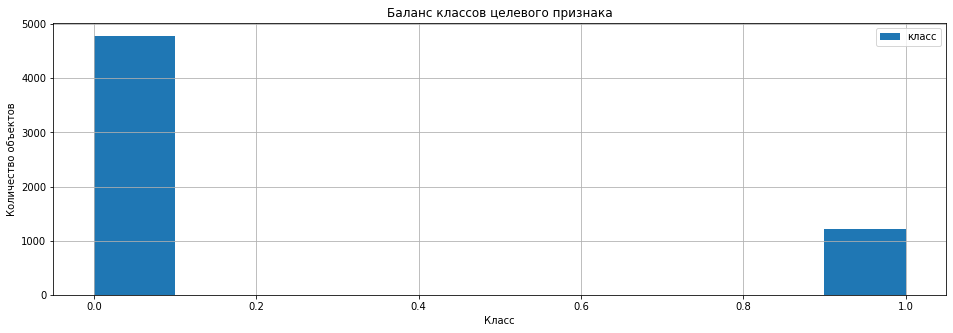

In [23]:
target_train.hist(figsize=(16,5))
plt.xlabel('Класс')
plt.ylabel('Количество объектов')
plt.title('Баланс классов целевого признака')
plt.legend(['класс'])
plt.show()

Наблюдаем дисбаланс классов - положительных объектов почти в 4 раза меньше, чем отрицательных. 

Для начала обучим модели логистической регрессией, решающего дерева и случайного леса, не учитывая дисбаланс классов.

#### Логистическая регрессия (без учета дисбаланса классов)

In [24]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)

predicted_valid = model.predict(features_valid)

probabilities_valid = model.predict_proba(features_valid)

print('Recall:', recall_score(target_valid, predicted_valid))
print('Precision:', precision_score(target_valid, predicted_valid))
print('F1:', f1_score(target_valid, predicted_valid))
print('AUC-ROC:', roc_auc_score(target_valid, probabilities_valid[:,1]))

Recall: 0.2071611253196931
Precision: 0.574468085106383
F1: 0.30451127819548873
AUC-ROC: 0.7705235416511026


In [25]:
def print_pr(recall, precision):
    plt.figure(figsize=(10,5))
    plt.plot(recall, precision)
    plt.grid()
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.0])
    plt.xlim([0.0, 1.0])
    plt.title('PR-кривая')
    plt.show()

In [26]:
def print_roc(fpr, tpr):
    plt.figure(figsize=(10,5))
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(fpr, tpr)
    plt.grid()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.ylim([0.0, 1.0])
    plt.xlim([0.0, 1.0])
    plt.legend(['случайная модель', 'обученная модель'])
    plt.title('ROC-кривая')
    plt.show()

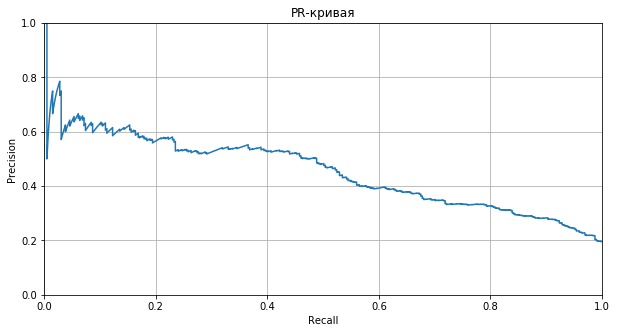

In [27]:
# построим график PR-кривой
precision_lr, recall_lr, threshold = precision_recall_curve(target_valid, probabilities_valid[:,1])
print_pr(recall_lr, precision_lr)

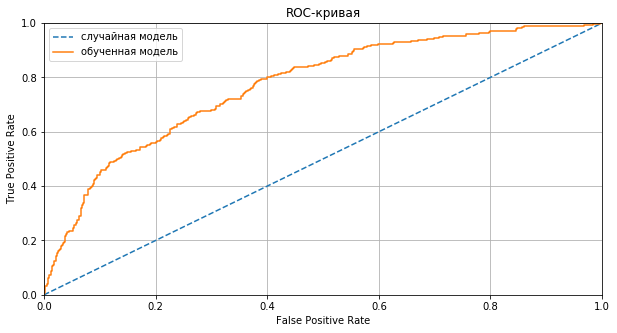

In [28]:
# построим график ROC-кривой обученной модели
fpr_lr, tpr_lr, thresholds = roc_curve(target_valid, probabilities_valid[:,1])
print_roc(fpr_lr, tpr_lr)

**Вывод**

Получили очень низкие значения метрик полноты, точности и f1-меры, что логично. Модель обучается на данных, в которых преобладают объекты только одного класса - нулевого. Из-за этого модель на валидационных данных не способна предсказывать целевой признак с большей точностью. Тем не менее, обученная модель лучше, чем случайная, что подтвержается значением **AUC-ROC = 0.77**.

#### Модель решающего дерева (без учета дисбаланса классов)

Найдем модель с наибольшим значением f1-меры. Для этого необходимо найти наилучшие значения следующих гиперпараметров:

- 'max_depth' - максимальная глубина дерева (будем перебирать значения от 1 до 15),
- 'min_samples_split' - наименьшее количество объектов выборки, попадающих в узел решающего дерева (от 2 до 10),
- 'min_samples_leaf' - наименьшее количество объектов выборки, необходимых для создания листа решающего дерева (от 1 до 10).

In [29]:
i = 0
tree_df = pd.DataFrame(columns=['max_depth', 'min_samples_split', 'min_samples_leaf', 'f1_train', 'f1_valid'])
best_model_tree = None
best_result = 0
best_depth = 0
best_split = 0
best_leaf = 0
for depth in tqdm(range(1,16)):
    for split in range(2,11):
        for leaf in range(1,11):
            model = DecisionTreeClassifier(
                random_state=12345, 
                max_depth=depth, 
                min_samples_split=split, 
                min_samples_leaf=leaf
            )
            model.fit(features_train, target_train)
            predicted_valid = model.predict(features_valid)
            predicted_train = model.predict(features_train)
            result_train = f1_score(target_train, predicted_train)
            result_valid = f1_score(target_valid, predicted_valid)
            tree_df.loc[i] = np.array([depth, split, leaf, result_train, result_valid])
            i += 1
            if result_valid > best_result:
                best_model_tree = model
                best_result = result_valid
                best_depth = depth
                best_split = split
                best_leaf = leaf

print(f'F1-мера наилучшей модели решающего дерева на валидационной выборке {best_result} при следующих параметрах:'+'\n'+
      f'max_depth = {best_depth}'+'\n'+
      f'min_samples_split = {best_split}'+'\n'+
      f'min_samples_leaf = {best_leaf}')

100%|██████████| 15/15 [00:41<00:00,  2.78s/it]

F1-мера наилучшей модели решающего дерева на валидационной выборке 0.5665101721439749 при следующих параметрах:
max_depth = 7
min_samples_split = 2
min_samples_leaf = 8


In [30]:
tree_df.sort_values(by='f1_valid', ascending=False).head()

,max_depth,min_samples_split,min_samples_leaf,f1_train,f1_valid
547,7.0,2.0,8.0,0.613065,0.56651
627,7.0,10.0,8.0,0.613065,0.56651
557,7.0,3.0,8.0,0.613065,0.56651
567,7.0,4.0,8.0,0.613065,0.56651
597,7.0,7.0,8.0,0.613065,0.56651


Посчитаем метрики полноты, точности и AUC-ROC для лучшей модели решающего дерева на валидационной выборке, а также построим графики PR-кривой и ROC-кривой.

In [31]:
best_model_tree.fit(features_train, target_train)
predicted_valid = best_model_tree.predict(features_valid)
probabilities_valid = best_model_tree.predict_proba(features_valid)

print('Recall:', recall_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('AUC-ROC:', roc_auc_score(target_valid, probabilities_valid[:,1]))

Recall: 0.4629156010230179
Precision 0.7298387096774194
AUC-ROC: 0.8279975648486215


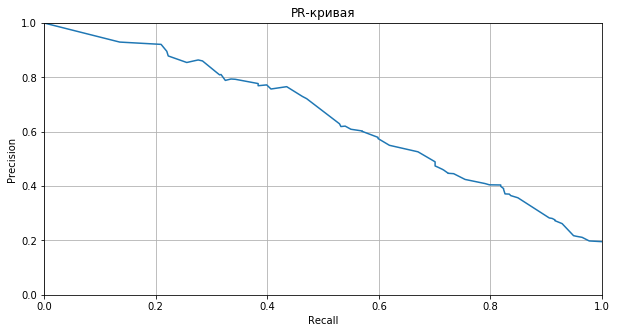

In [32]:
# построим график PR-кривой
precision_dt, recall_dt, threshold = precision_recall_curve(target_valid, probabilities_valid[:,1])
print_pr(recall_dt, precision_dt)

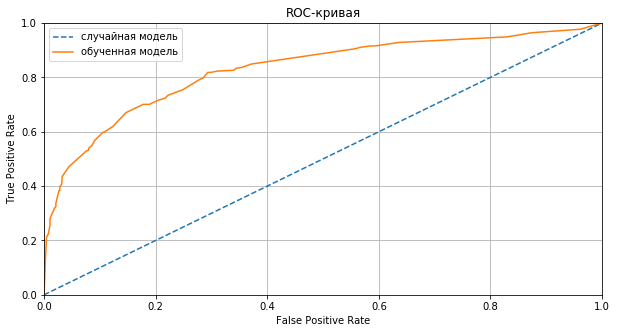

In [33]:
# построим график ROC-кривой обученной модели
fpr_dt, tpr_dt, thresholds = roc_curve(target_valid, probabilities_valid[:,1])
print_roc(fpr_dt, tpr_dt)

**Вывод**

Модель решающего дерева показала себя лучше модели логистической регрессии.Значение f1-меры больше, чем в первом случае и составляет **~0.5665**. Сравнили обученную модель со случайной и выяснили, что наша модель лучше, так как значение **AUC-ROC ~ 0.83**.

#### Модель случайного леса (без учета дисбаланса классов)

Найдем модель с наибольшим значением f1-меры. Для этого необходимо найти наилучшие значения следующих гиперпараметров:
- 'max_depth' - максимальная глубина дерева (будем перебирать значения от 1 до 10),
- 'min_samples_split' - наименьшее количество объектов выборки, попадающих в узел решающего дерева (от 2 до 5),
- 'min_samples_leaf' - наименьшее количество объектов выборки, необходимых для создания листа решающего дерева (от 1 до 5),
- 'n_estimators' - количество деревьев в лесу (от 10 до 100 с шагом 10).

In [34]:
i = 0
forest_df = pd.DataFrame(columns=['n_estimators','max_depth','min_samples_split','min_samples_leaf','f1_train','f1_valid'])
best_result = 0
best_model_forest = None
best_depth = 0
best_split = 0
best_leaf = 0
best_est = 0
for depth in tqdm(range(1,11)):
    for split in range(2,6):
        for leaf in range(1,6):
            for est in range(10, 101, 10):
                model = RandomForestClassifier(
                    random_state=12345, 
                    n_estimators=est, 
                    max_depth=depth, 
                    min_samples_split=split,
                    min_samples_leaf=leaf
                )
                model.fit(features_train, target_train)
                predicted_valid = model.predict(features_valid)
                predicted_train = model.predict(features_train)
                result_train = f1_score(target_train, predicted_train)
                result_valid = f1_score(target_valid, predicted_valid)
                forest_df.loc[i] = np.array([est, depth, split, leaf, result_train, result_valid])
                i += 1
                if result_valid > best_result:
                    best_model_forest = model
                    best_result = result_valid
                    best_depth = depth
                    best_split = split
                    best_leaf = leaf
                    best_est = est

print(f'F1-мера наилучшей модели случайного леса на валидационной выборке {best_result} при следующих параметрах:'+'\n'+
      f'n_estimators = {best_est}'+'\n'+
      f'max_depth = {best_depth}'+'\n'+
      f'min_samples_split = {best_split}'+'\n'+
      f'min_samples_leaf = {best_leaf}')

100%|██████████| 10/10 [11:11<00:00, 67.12s/it]

F1-мера наилучшей модели случайного леса на валидационной выборке 0.5681444991789819 при следующих параметрах:
n_estimators = 40
max_depth = 10
min_samples_split = 2
min_samples_leaf = 4


In [35]:
forest_df.sort_values(by='f1_valid', ascending=False).head()

,n_estimators,max_depth,min_samples_split,min_samples_leaf,f1_train,f1_valid
1833,40.0,10.0,2.0,4.0,0.665625,0.568144
1883,40.0,10.0,3.0,4.0,0.665625,0.568144
1933,40.0,10.0,4.0,4.0,0.665625,0.568144
1983,40.0,10.0,5.0,4.0,0.665625,0.568144
1915,60.0,10.0,4.0,2.0,0.685774,0.562914


Посчитаем метрики полноты, точности и AUC-ROC для лучшей модели случайного леса на валидационной выборке, а также построим графики PR-кривой и ROC-кривой.

In [36]:
best_model_forest.fit(features_train, target_train)
predicted_valid = best_model_forest.predict(features_valid)
probabilities_valid = best_model_forest.predict_proba(features_valid)

print('Recall:', recall_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('AUC-ROC:', roc_auc_score(target_valid, probabilities_valid[:,1]))

Recall: 0.4424552429667519
Precision 0.7935779816513762
AUC-ROC: 0.8506578246722798


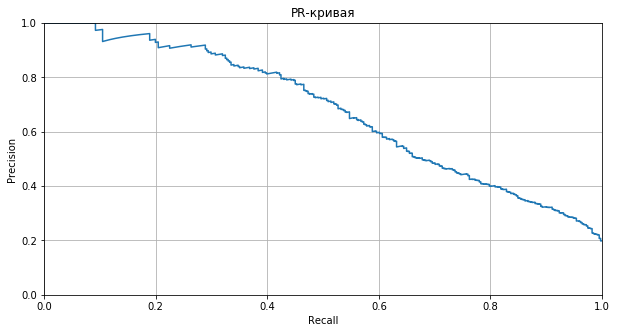

In [37]:
# построим график PR-кривой
precision_rf, recall_rf, threshold = precision_recall_curve(target_valid, probabilities_valid[:,1])
print_pr(recall_rf, precision_rf)

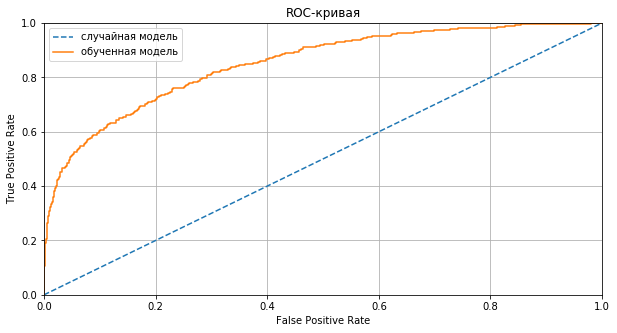

In [38]:
# построим график ROC-кривой обученной модели
fpr_rf, tpr_rf, thresholds = roc_curve(target_valid, probabilities_valid[:,1])
print_roc(fpr_rf, tpr_rf)

**Вывод**

Значение f1-меры лучшей модели случайного леса получилось почти таким же, как и для лучшей модели решающего дерева и составляет **~0.5681**. Сравнили обученную модель со случайной и выяснили, что наша модель лучше, так как значение **AUC-ROC ~ 0.85**.

#### Сравнение моделей

Сведем полученные метрики для трех обученных моделей в таблицу, а также построим на PR-кривые и ROC-кривые на одном графике.

In [39]:
data = [['Logistic Regression', 0.2072, 0.5745, 0.3045, 0.7705],
        ['Decision Tree', 0.4629, 0.7298, 0.5665, 0.828],
        ['Random Forest', 0.4425, 0.7936, 0.5681, 0.8507]]
columns = ['Model', 'Recall', 'Precision', 'F1-score', 'AUC-ROC']
models_no_balance = pd.DataFrame(data=data, columns=columns)
models_no_balance

,Model,Recall,Precision,F1-score,AUC-ROC
0,Logistic Regression,0.2072,0.5745,0.3045,0.7705
1,Decision Tree,0.4629,0.7298,0.5665,0.8280
2,Random Forest,0.4425,0.7936,0.5681,0.8507


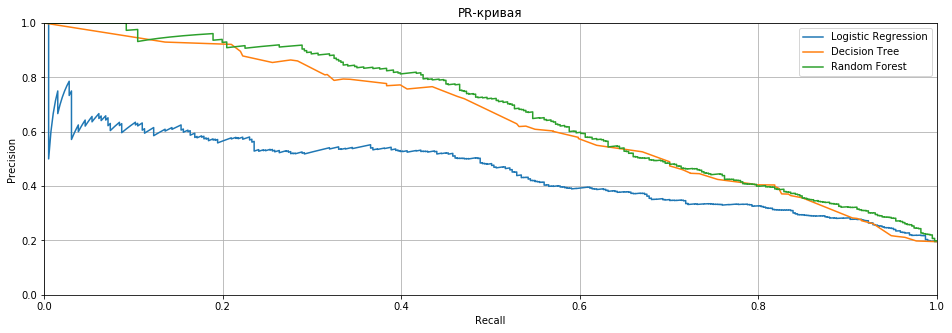

In [40]:
plt.figure(figsize=(16,5))
plt.plot(recall_lr, precision_lr)
plt.plot(recall_dt, precision_dt)
plt.plot(recall_rf, precision_rf)
plt.grid()
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.legend(['Logistic Regression', 'Decision Tree', 'Random Forest'])
plt.title('PR-кривая')
plt.show()

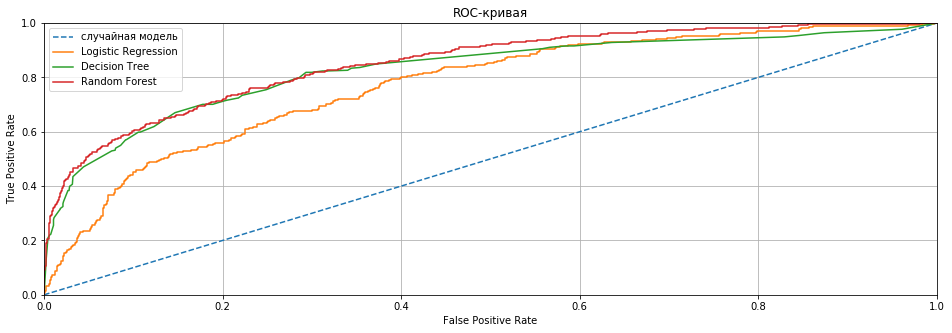

In [41]:
plt.figure(figsize=(16,5))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_lr, tpr_lr)
plt.plot(fpr_dt, tpr_dt)
plt.plot(fpr_rf, tpr_rf)
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.legend(['случайная модель', 'Logistic Regression', 'Decision Tree', 'Random Forest'])
plt.title('ROC-кривая')
plt.show()

**Вывод**

Представленные графики PR-кривой и ROC-кривой подтвержают результаты: все три модели превосходят случайную модель, качество моделей решающего дерева и случайного леса выше, чем у модели логистической регрессии. Однако, ни одна из моделей не показала необходимое значение f1-меры в 0.59. Необходимо повысить качество моделей путем решения проблемы дисбаланса классов.

## Борьба с дисбалансом

Решать проблему дисбаланса классов будем тремя способами:
1. Использованием аргумента 'class_weight' при обучении моделей
2. Увеличением выборки (увеличением количества объектов единичного класса)
3. Уменьшением выборки (уменьшением количества объектов нулевого класса)

### Способ 1. Использование аргумента 'class_weight'

#### Логистическая регрессия (с учетом дисбаланса классов)

Обучим модель, найдем значения метрик (полнота, точность, F1-мера и AUC-ROC) на валидационной выборке, построим графики PR-кривой и ROC-кривой.

In [42]:
model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)

predicted_valid = model.predict(features_valid)

probabilities_valid = model.predict_proba(features_valid)

print('Recall:', recall_score(target_valid, predicted_valid))
print('Precision:', precision_score(target_valid, predicted_valid))
print('F1:', f1_score(target_valid, predicted_valid))
print('AUC-ROC:', roc_auc_score(target_valid, probabilities_valid[:,1]))

Recall: 0.6828644501278772
Precision: 0.36475409836065575
F1: 0.4755120213713268
AUC-ROC: 0.7726185348082


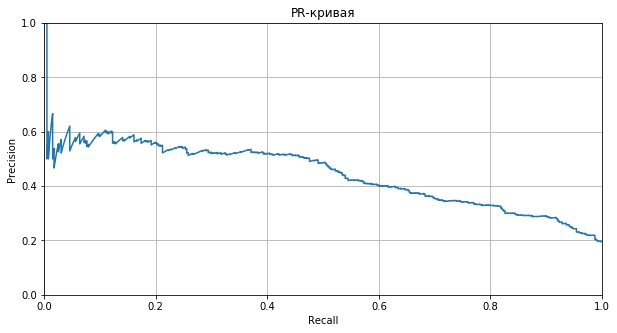

In [43]:
# построим график PR-кривой
precision_lr_bal, recall_lr_bal, threshold = precision_recall_curve(target_valid, probabilities_valid[:,1])
print_pr(recall_lr_bal, precision_lr_bal)

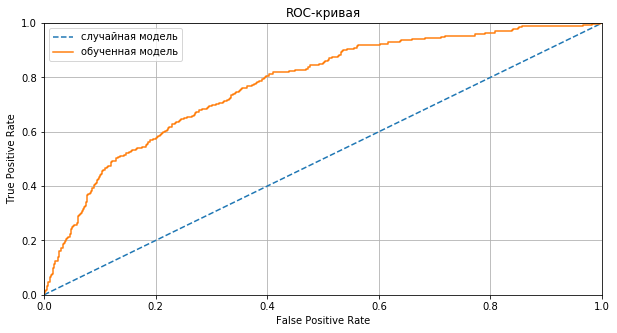

In [44]:
# построим график ROC-кривой обученной модели
fpr_lr_bal, tpr_lr_bal, thresholds = roc_curve(target_valid, probabilities_valid[:,1])
print_roc(fpr_lr_bal, tpr_lr_bal)

**Вывод**

Получили **f1-меру, равную 0.4755**. Это больше, чем раньше, когда не учитывали дисбаланс классов, но все же до требуемого значения модель не дотягивает.

#### Модель решающего дерева (с учетом дисбаланса классов)

Найдем модель с наибольшим значением f1-меры. Для этого необходимо найти наилучшие значения следующих гиперпараметров:

- 'max_depth' - максимальная глубина дерева (будем перебирать значения от 1 до 15),
- 'min_samples_split' - наименьшее количество объектов выборки, попадающих в узел решающего дерева (от 2 до 10),
- 'min_samples_leaf' - наименьшее количество объектов выборки, необходимых для создания листа решающего дерева (от 1 до 10).

In [45]:
i = 0
tree_df_bal = pd.DataFrame(columns=['max_depth', 'min_samples_split', 'min_samples_leaf', 'f1_train', 'f1_valid'])
best_model_tree = None
best_result = 0
best_depth = 0
best_split = 0
best_leaf = 0
for depth in tqdm(range(1,16)):
    for split in range(2,11):
        for leaf in range(1,11):
            model = DecisionTreeClassifier(
                random_state=12345, 
                max_depth=depth, 
                min_samples_split=split, 
                min_samples_leaf=leaf,
                class_weight='balanced'
            )
            model.fit(features_train, target_train)
            predicted_valid = model.predict(features_valid)
            predicted_train = model.predict(features_train)
            result_train = f1_score(target_train, predicted_train)
            result_valid = f1_score(target_valid, predicted_valid)
            tree_df_bal.loc[i] = np.array([depth, split, leaf, result_train, result_valid])
            i += 1
            if result_valid > best_result:
                best_model_tree = model
                best_result = result_valid
                best_depth = depth
                best_split = split
                best_leaf = leaf

print(f'F1-мера наилучшей модели решающего дерева на валидационной выборке {best_result} при следующих параметрах:'+'\n'+
      f'max_depth = {best_depth}'+'\n'+
      f'min_samples_split = {best_split}'+'\n'+
      f'min_samples_leaf = {best_leaf}')

100%|██████████| 15/15 [00:42<00:00,  2.85s/it]

F1-мера наилучшей модели решающего дерева на валидационной выборке 0.5619335347432024 при следующих параметрах:
max_depth = 6
min_samples_split = 2
min_samples_leaf = 3


In [46]:
tree_df_bal.sort_values(by='f1_valid', ascending=False).head()

,max_depth,min_samples_split,min_samples_leaf,f1_train,f1_valid
452,6.0,2.0,3.0,0.611857,0.561934
532,6.0,10.0,3.0,0.611857,0.561934
462,6.0,3.0,3.0,0.611857,0.561934
522,6.0,9.0,3.0,0.611857,0.561934
512,6.0,8.0,3.0,0.611857,0.561934


Посчитаем метрики полноты, точности и AUC-ROC для лучшей модели решающего дерева на валидационной выборке, а также построим графики PR-кривой и ROC-кривой.

In [47]:
best_model_tree.fit(features_train, target_train)
predicted_valid = best_model_tree.predict(features_valid)
probabilities_valid = best_model_tree.predict_proba(features_valid)

print('Recall:', recall_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('AUC-ROC:', roc_auc_score(target_valid, probabilities_valid[:,1]))

Recall: 0.7135549872122762
Precision 0.4634551495016611
AUC-ROC: 0.8177657962960903


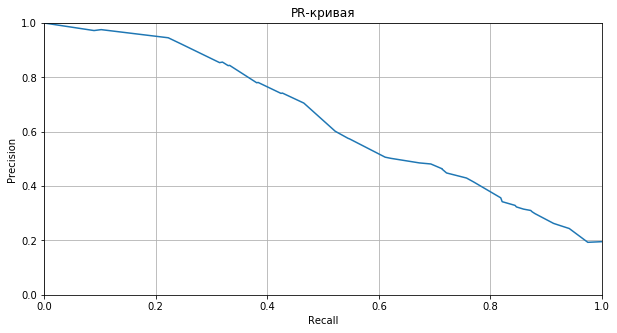

In [48]:
# построим график PR-кривой
precision_dt_bal, recall_dt_bal, threshold = precision_recall_curve(target_valid, probabilities_valid[:,1])
print_pr(recall_dt_bal, precision_dt_bal)

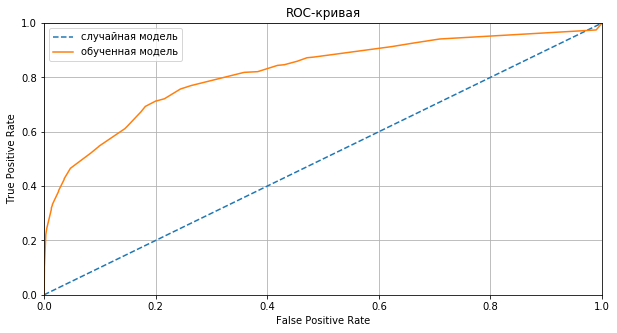

In [49]:
# построим график ROC-кривой обученной модели
fpr_dt_bal, tpr_dt_bal, thresholds = roc_curve(target_valid, probabilities_valid[:,1])
print_roc(fpr_dt_bal, tpr_dt_bal)

**Вывод**

Модель решающего дерева показала себя лучше модели логистической регрессии, как и без учета дисбаланса классов. Но если сравнивать модели решающего дерева между собой, то параметр 'class_weight' не сказался положительно на значении **f1-меры, она незначительно уменьшилась с 0.5665 до 0.5619**. 

#### Модель случайного леса (с учетом дисбаланса классов)

Найдем модель с наибольшим значением f1-меры. Для этого необходимо найти наилучшие значения следующих гиперпараметров:
- 'max_depth' - максимальная глубина дерева (будем перебирать значения от 1 до 10),
- 'min_samples_split' - наименьшее количество объектов выборки, попадающих в узел решающего дерева (от 2 до 5),
- 'min_samples_leaf' - наименьшее количество объектов выборки, необходимых для создания листа решающего дерева (от 1 до 5),
- 'n_estimators' - количество деревьев в лесу (от 10 до 100 с шагом 10).

In [50]:
i = 0
forest_df_bal = pd.DataFrame(columns=['n_estimators','max_depth','min_samples_split','min_samples_leaf','f1_train','f1_valid'])
best_result = 0
best_model_forest = None
best_depth = 0
best_split = 0
best_leaf = 0
best_est = 0
for depth in tqdm(range(1,11)):
    for split in range(2,6):
        for leaf in range(1,6):
            for est in range(10, 101, 10):
                model = RandomForestClassifier(
                    random_state=12345, 
                    n_estimators=est, 
                    max_depth=depth, 
                    min_samples_split=split,
                    min_samples_leaf=leaf,
                    class_weight='balanced'
                )
                model.fit(features_train, target_train)
                predicted_valid = model.predict(features_valid)
                predicted_train = model.predict(features_train)
                result_train = f1_score(target_train, predicted_train)
                result_valid = f1_score(target_valid, predicted_valid)
                forest_df_bal.loc[i] = np.array([est, depth, split, leaf, result_train, result_valid])
                i += 1
                if result_valid > best_result:
                    best_model_forest = model
                    best_result = result_valid
                    best_depth = depth
                    best_split = split
                    best_leaf = leaf
                    best_est = est

print(f'F1-мера наилучшей модели случайного леса на валидационной выборке {best_result} при следующих параметрах:'+'\n'+
      f'n_estimators = {best_est}'+'\n'+
      f'max_depth = {best_depth}'+'\n'+
      f'min_samples_split = {best_split}'+'\n'+
      f'min_samples_leaf = {best_leaf}')

100%|██████████| 10/10 [11:06<00:00, 66.69s/it]

F1-мера наилучшей модели случайного леса на валидационной выборке 0.6083832335329341 при следующих параметрах:
n_estimators = 80
max_depth = 9
min_samples_split = 2
min_samples_leaf = 3


In [51]:
forest_df_bal.sort_values(by='f1_valid', ascending=False).head()

,n_estimators,max_depth,min_samples_split,min_samples_leaf,f1_train,f1_valid
1627,80.0,9.0,2.0,3.0,0.751794,0.608383
1677,80.0,9.0,3.0,3.0,0.751794,0.608383
1777,80.0,9.0,5.0,3.0,0.751794,0.608383
1727,80.0,9.0,4.0,3.0,0.751794,0.608383
1967,80.0,10.0,5.0,2.0,0.790480,0.606965


Посчитаем метрики полноты, точности и AUC-ROC для лучшей модели случайного леса на валидационной выборке, а также построим графики PR-кривой и ROC-кривой.

In [52]:
best_model_forest.fit(features_train, target_train)
predicted_valid = best_model_forest.predict(features_valid)
probabilities_valid = best_model_forest.predict_proba(features_valid)

print('Recall:', recall_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('AUC-ROC:', roc_auc_score(target_valid, probabilities_valid[:,1]))

Recall: 0.649616368286445
Precision 0.5720720720720721
AUC-ROC: 0.8534251866499024


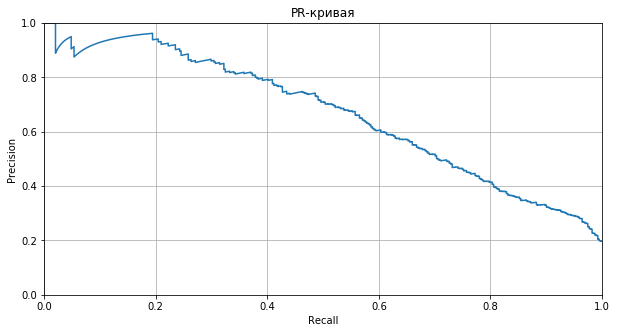

In [53]:
# построим график PR-кривой
precision_rf_bal, recall_rf_bal, threshold = precision_recall_curve(target_valid, probabilities_valid[:,1])
print_pr(recall_rf_bal, precision_rf_bal)

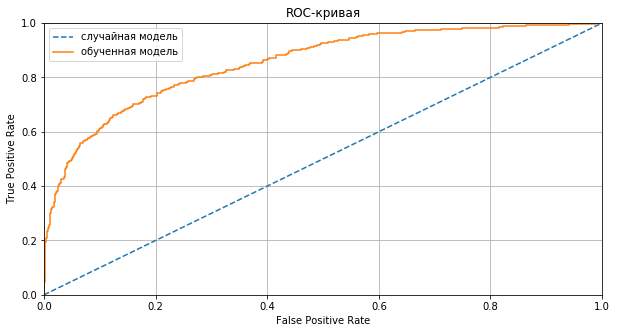

In [54]:
# построим график ROC-кривой обученной модели
fpr_rf_bal, tpr_rf_bal, thresholds = roc_curve(target_valid, probabilities_valid[:,1])
print_roc(fpr_rf_bal, tpr_rf_bal)

**Вывод**

Параметр 'class_weight' оказал положительное влияние на значение **f1-меры, она увеличилась с 0.5681 до 0.6083** на валидационной выборке. Это первая модель, которая преодолела необходимой порог значения f1-меры.

### Способ 2. Увеличение выборки (upsampling)

Для увеличения выборки, содержащей объекты класса '1', применим технику **upsampling**. Для этого: разделим обучающие выборки по классам; количество объектов класса '1' увеличим в 2 раза; объединим выборки и перемешаем.

In [55]:
# разделяем объекты класса '0' и '1' тренировочной выборки
features_train_zeros = features_train[target_train == 0]
features_train_ones = features_train[target_train == 1]
target_train_zeros = target_train[target_train == 0]
target_train_ones = target_train[target_train == 1]

# увеличиваем количество объектов класса '1' в 2 раза и соединяем с объектами класса '0'
features_train_up = pd.concat([features_train_zeros] + [features_train_ones] * 2)
target_train_up = pd.concat([target_train_zeros] + [target_train_ones] * 2)

# перемешиваем получившиеся выборки
features_train_up, target_train_up = shuffle(features_train_up, target_train_up, random_state=12345)

#### Логистическая регрессия (upsampling)

Обучим модель на обучающей выборке (после upsampling), найдем значения метрик (полнота, точность, F1-мера и AUC-ROC) на валидационной выборке, построим графики PR-кривой и ROC-кривой.

In [56]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train_up, target_train_up)

predicted_valid = model.predict(features_valid)

probabilities_valid = model.predict_proba(features_valid)

print('Recall:', recall_score(target_valid, predicted_valid))
print('Precision:', precision_score(target_valid, predicted_valid))
print('F1:', f1_score(target_valid, predicted_valid))
print('AUC-ROC:', roc_auc_score(target_valid, probabilities_valid[:,1]))

Recall: 0.46547314578005117
Precision: 0.5069637883008357
F1: 0.48533333333333334
AUC-ROC: 0.7716441563519779


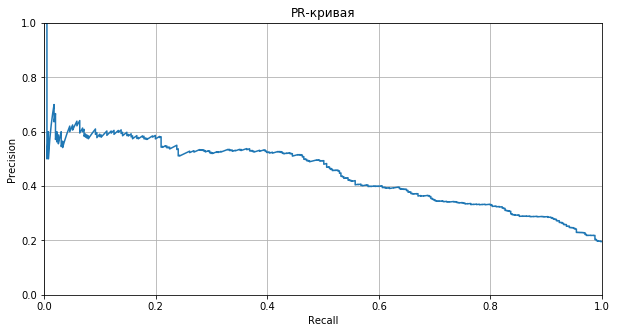

In [57]:
# построим график PR-кривой
precision_lr_up, recall_lr_up, threshold = precision_recall_curve(target_valid, probabilities_valid[:,1])
print_pr(recall_lr_up, precision_lr_up)

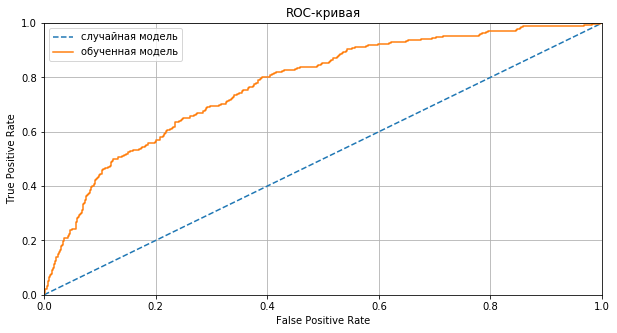

In [58]:
# построим график ROC-кривой обученной модели
fpr_lr_up, tpr_lr_up, thresholds = roc_curve(target_valid, probabilities_valid[:,1])
print_roc(fpr_lr_up, tpr_lr_up)

**Вывод**

Получили прирост f1-меры в сравнении со способом 1, **увеличилась с 0.4755 до 0.4853**. Однако требуемое значение (0.59) данная модель не превзошла.

#### Модель решающего дерева (upsampling)

Найдем модель с наибольшим значением f1-меры. Для этого необходимо найти наилучшие значения следующих гиперпараметров:

- 'max_depth' - максимальная глубина дерева (будем перебирать значения от 1 до 15),
- 'min_samples_split' - наименьшее количество объектов выборки, попадающих в узел решающего дерева (от 2 до 10),
- 'min_samples_leaf' - наименьшее количество объектов выборки, необходимых для создания листа решающего дерева (от 1 до 10).

In [59]:
i = 0
tree_df_up = pd.DataFrame(columns=['max_depth', 'min_samples_split', 'min_samples_leaf', 'f1_train', 'f1_valid'])
best_model_tree = None
best_result = 0
best_depth = 0
best_split = 0
best_leaf = 0
for depth in tqdm(range(1,16)):
    for split in range(2,11):
        for leaf in range(1,11):
            model = DecisionTreeClassifier(
                random_state=12345, 
                max_depth=depth, 
                min_samples_split=split, 
                min_samples_leaf=leaf
            )
            model.fit(features_train_up, target_train_up)
            predicted_valid = model.predict(features_valid)
            predicted_train = model.predict(features_train)
            result_train = f1_score(target_train, predicted_train)
            result_valid = f1_score(target_valid, predicted_valid)
            tree_df_up.loc[i] = np.array([depth, split, leaf, result_train, result_valid])
            i += 1
            if result_valid > best_result:
                best_model_tree = model
                best_result = result_valid
                best_depth = depth
                best_split = split
                best_leaf = leaf

print(f'F1-мера наилучшей модели решающего дерева на валидационной выборке {best_result} при следующих параметрах:'+'\n'+
      f'max_depth = {best_depth}'+'\n'+
      f'min_samples_split = {best_split}'+'\n'+
      f'min_samples_leaf = {best_leaf}')

100%|██████████| 15/15 [00:45<00:00,  3.04s/it]

F1-мера наилучшей модели решающего дерева на валидационной выборке 0.5789473684210527 при следующих параметрах:
max_depth = 7
min_samples_split = 2
min_samples_leaf = 5


In [60]:
tree_df_up.sort_values(by='f1_valid', ascending=False).head()

,max_depth,min_samples_split,min_samples_leaf,f1_train,f1_valid
604,7.0,8.0,5.0,0.651182,0.578947
594,7.0,7.0,5.0,0.651182,0.578947
574,7.0,5.0,5.0,0.651182,0.578947
564,7.0,4.0,5.0,0.651182,0.578947
614,7.0,9.0,5.0,0.651182,0.578947


Посчитаем метрики полноты, точности и AUC-ROC для лучшей модели решающего дерева на валидационной выборке, а также построим графики PR-кривой и ROC-кривой.

In [61]:
best_model_tree.fit(features_train_up, target_train_up)
predicted_valid = best_model_tree.predict(features_valid)
probabilities_valid = best_model_tree.predict_proba(features_valid)

print('Recall:', recall_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('AUC-ROC:', roc_auc_score(target_valid, probabilities_valid[:,1]))

Recall: 0.5626598465473146
Precision 0.5962059620596206
AUC-ROC: 0.8261751751258506


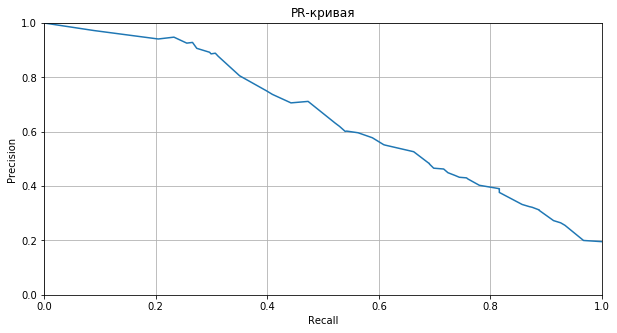

In [62]:
# построим график PR-кривой
precision_dt_up, recall_dt_up, threshold = precision_recall_curve(target_valid, probabilities_valid[:,1])
print_pr(recall_dt_up, precision_dt_up)

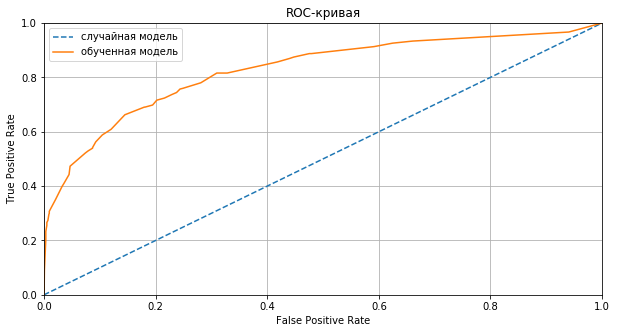

In [63]:
# построим график ROC-кривой обученной модели
fpr_dt_up, tpr_dt_up, thresholds = roc_curve(target_valid, probabilities_valid[:,1])
print_roc(fpr_dt_up, tpr_dt_up)

**Вывод**

Получили прирост f1-меры по сравнению со способом 1, **увеличилась с 0.5619 до 0.5789**. Однако требуемое значение (0.59) данная модель не превзошла.

#### Модель случайного леса (upsampling)

Найдем модель с наибольшим значением f1-меры. Для этого необходимо найти наилучшие значения следующих гиперпараметров:
- 'max_depth' - максимальная глубина дерева (будем перебирать значения от 1 до 10),
- 'min_samples_split' - наименьшее количество объектов выборки, попадающих в узел решающего дерева (от 2 до 5),
- 'min_samples_leaf' - наименьшее количество объектов выборки, необходимых для создания листа решающего дерева (от 1 до 5),
- 'n_estimators' - количество деревьев в лесу (от 10 до 100 с шагом 10).

In [64]:
i = 0
forest_df_up = pd.DataFrame(columns=['n_estimators','max_depth','min_samples_split','min_samples_leaf','f1_train','f1_valid'])
best_result = 0
best_model_forest = None
best_depth = 0
best_split = 0
best_leaf = 0
best_est = 0
for depth in tqdm(range(1,11)):
    for split in range(2,6):
        for leaf in range(1,6):
            for est in range(10, 101, 10):
                model = RandomForestClassifier(
                    random_state=12345, 
                    n_estimators=est, 
                    max_depth=depth, 
                    min_samples_split=split,
                    min_samples_leaf=leaf
                )
                model.fit(features_train_up, target_train_up)
                predicted_valid = model.predict(features_valid)
                predicted_train = model.predict(features_train)
                result_train = f1_score(target_train, predicted_train)
                result_valid = f1_score(target_valid, predicted_valid)
                forest_df_up.loc[i] = np.array([est, depth, split, leaf, result_train, result_valid])
                i += 1
                if result_valid > best_result:
                    best_model_forest = model
                    best_result = result_valid
                    best_depth = depth
                    best_split = split
                    best_leaf = leaf
                    best_est = est

print(f'F1-мера наилучшей модели случайного леса на валидационной выборке {best_result} при следующих параметрах:'+'\n'+
      f'n_estimators = {best_est}'+'\n'+
      f'max_depth = {best_depth}'+'\n'+
      f'min_samples_split = {best_split}'+'\n'+
      f'min_samples_leaf = {best_leaf}')

100%|██████████| 10/10 [12:42<00:00, 76.29s/it]

F1-мера наилучшей модели случайного леса на валидационной выборке 0.6132208157524615 при следующих параметрах:
n_estimators = 70
max_depth = 9
min_samples_split = 2
min_samples_leaf = 5


In [65]:
forest_df_up.sort_values(by='f1_valid', ascending=False).head()

,n_estimators,max_depth,min_samples_split,min_samples_leaf,f1_train,f1_valid
1746,70.0,9.0,4.0,5.0,0.714928,0.613221
1646,70.0,9.0,2.0,5.0,0.714928,0.613221
1796,70.0,9.0,5.0,5.0,0.714928,0.613221
1696,70.0,9.0,3.0,5.0,0.714928,0.613221
1452,30.0,8.0,3.0,1.0,0.697024,0.611961


Посчитаем метрики полноты, точности и AUC-ROC для лучшей модели случайного леса на валидационной выборке, а также построим графики PR-кривой и ROC-кривой.

In [66]:
best_model_forest.fit(features_train_up, target_train_up)
predicted_valid = best_model_forest.predict(features_valid)
probabilities_valid = best_model_forest.predict_proba(features_valid)

print('Recall:', recall_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('AUC-ROC:', roc_auc_score(target_valid, probabilities_valid[:,1]))

Recall: 0.5575447570332481
Precision 0.68125
AUC-ROC: 0.8518865270322467


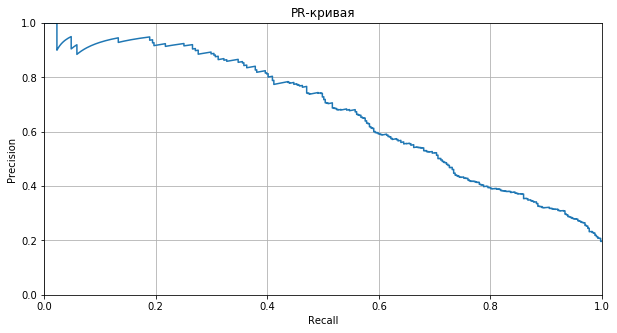

In [67]:
# построим график PR-кривой
precision_rf_up, recall_rf_up, threshold = precision_recall_curve(target_valid, probabilities_valid[:,1])
print_pr(recall_rf_up, precision_rf_up)

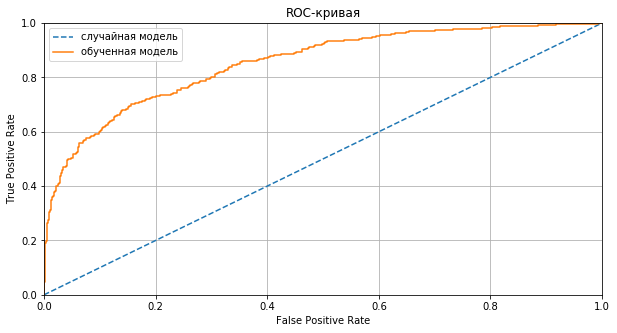

In [68]:
# построим график ROC-кривой обученной модели
fpr_rf_up, tpr_rf_up, thresholds = roc_curve(target_valid, probabilities_valid[:,1])
print_roc(fpr_rf_up, tpr_rf_up)

**Вывод**

Благодаря использованию техники **upsampling** значение **f1-меры увеличилось с 0.6083 до 0.6132** на валидационной выборке по сравнению со способом 1. Данная модель также преодолела необходимый порог и может в дальнейшем использоваться для проверки на тестовой выборке.

### Способ 3. Уменьшение выборки (downsampling)

Для уменьшения выборки, содержащей объекты класса '0', применим технику **downsampling**. Для этого: разделим обучающие выборки по классам; количество объектов класса '0' уменьшим в 2 раза; объединим выборки и перемешаем.

In [69]:
# разделяем объекты класса '0' и '1' тренировочной выборки
features_train_zeros = features_train[target_train == 0]
features_train_ones = features_train[target_train == 1]
target_train_zeros = target_train[target_train == 0]
target_train_ones = target_train[target_train == 1]

# уменьшаем количество объектов класса '0' в 2 раза и соединяем с объектами класса '1'
features_train_down = pd.concat([features_train_zeros.sample(frac=0.5, random_state=12345)] + [features_train_ones])
target_train_down = pd.concat([target_train_zeros.sample(frac=0.5, random_state=12345)] + [target_train_ones])

# перемешиваем получившиеся выборки
features_train_down, target_train_down = shuffle(features_train_down, target_train_down, random_state=12345)

#### Логистическая регрессия (downsampling)

Обучим модель на обучающей выборке (после downsampling), найдем значения метрик (полнота, точность, F1-мера и AUC-ROC) на валидационной выборке, построим графики PR-кривой и ROC-кривой.

In [70]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train_down, target_train_down)

predicted_valid = model.predict(features_valid)

probabilities_valid = model.predict_proba(features_valid)

print('Recall:', recall_score(target_valid, predicted_valid))
print('Precision:', precision_score(target_valid, predicted_valid))
print('F1:', f1_score(target_valid, predicted_valid))
print('AUC-ROC:', roc_auc_score(target_valid, probabilities_valid[:,1]))

Recall: 0.4731457800511509
Precision: 0.4946524064171123
F1: 0.4836601307189542
AUC-ROC: 0.7720637907931569


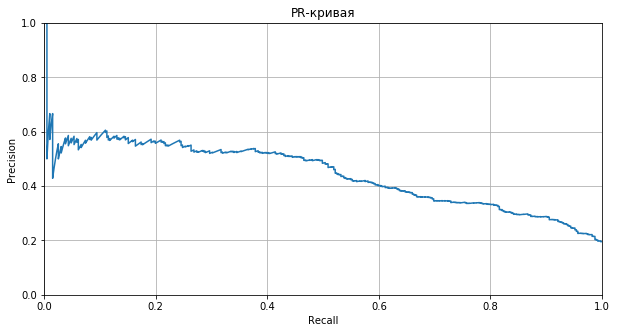

In [71]:
# построим график PR-кривой
precision_lr_down, recall_lr_down, threshold = precision_recall_curve(target_valid, probabilities_valid[:,1])
print_pr(recall_lr_down, precision_lr_down)

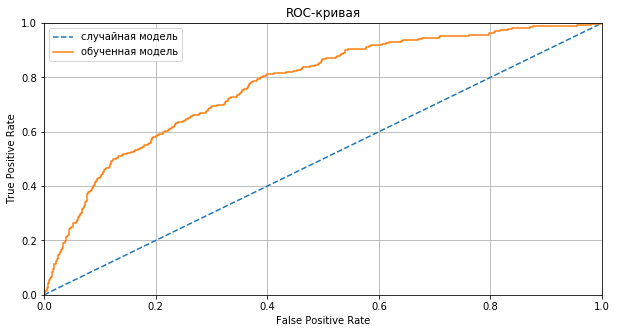

In [72]:
# построим график ROC-кривой обученной модели
fpr_lr_down, tpr_lr_down, thresholds = roc_curve(target_valid, probabilities_valid[:,1])
print_roc(fpr_lr_down, tpr_lr_down)

**Вывод**

Значение f1-меры после применения техники **downsampling** полученной модели получили **0.4837**, что незначительно хуже, чем при применении техники **upsampling (0.4853)** 

#### Модель решающего дерева (downsampling)

Найдем модель с наибольшим значением f1-меры. Для этого необходимо найти наилучшие значения следующих гиперпараметров:

- 'max_depth' - максимальная глубина дерева (будем перебирать значения от 1 до 15),
- 'min_samples_split' - наименьшее количество объектов выборки, попадающих в узел решающего дерева (от 2 до 10),
- 'min_samples_leaf' - наименьшее количество объектов выборки, необходимых для создания листа решающего дерева (от 1 до 10).

In [73]:
i = 0
tree_df_down = pd.DataFrame(columns=['max_depth', 'min_samples_split', 'min_samples_leaf', 'f1_train', 'f1_valid'])
best_model_tree = None
best_result = 0
best_depth = 0
best_split = 0
best_leaf = 0
for depth in tqdm(range(1,16)):
    for split in range(2,11):
        for leaf in range(1,11):
            model = DecisionTreeClassifier(
                random_state=12345, 
                max_depth=depth, 
                min_samples_split=split, 
                min_samples_leaf=leaf
            )
            model.fit(features_train_down, target_train_down)
            predicted_valid = model.predict(features_valid)
            predicted_train = model.predict(features_train)
            result_train = f1_score(target_train, predicted_train)
            result_valid = f1_score(target_valid, predicted_valid)
            tree_df_down.loc[i] = np.array([depth, split, leaf, result_train, result_valid])
            i += 1
            if result_valid > best_result:
                best_model_tree = model
                best_result = result_valid
                best_depth = depth
                best_split = split
                best_leaf = leaf

print(f'F1-мера наилучшей модели решающего дерева на валидационной выборке {best_result} при следующих параметрах:'+'\n'+
      f'max_depth = {best_depth}'+'\n'+
      f'min_samples_split = {best_split}'+'\n'+
      f'min_samples_leaf = {best_leaf}')

100%|██████████| 15/15 [00:29<00:00,  1.96s/it]

F1-мера наилучшей модели решающего дерева на валидационной выборке 0.5919811320754716 при следующих параметрах:
max_depth = 7
min_samples_split = 2
min_samples_leaf = 7


In [74]:
tree_df_down.sort_values(by='f1_valid', ascending=False).head()

,max_depth,min_samples_split,min_samples_leaf,f1_train,f1_valid
606,7.0,8.0,7.0,0.638995,0.591981
626,7.0,10.0,7.0,0.638995,0.591981
546,7.0,2.0,7.0,0.638995,0.591981
556,7.0,3.0,7.0,0.638995,0.591981
566,7.0,4.0,7.0,0.638995,0.591981


Посчитаем метрики полноты, точности и AUC-ROC для лучшей модели решающего дерева на валидационной выборке, а также построим графики PR-кривой и ROC-кривой.

In [75]:
best_model_tree.fit(features_train_down, target_train_down)
predicted_valid = best_model_tree.predict(features_valid)
probabilities_valid = best_model_tree.predict_proba(features_valid)

print('Recall:', recall_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('AUC-ROC:', roc_auc_score(target_valid, probabilities_valid[:,1]))

Recall: 0.6419437340153452
Precision 0.5492341356673961
AUC-ROC: 0.8332032572533972


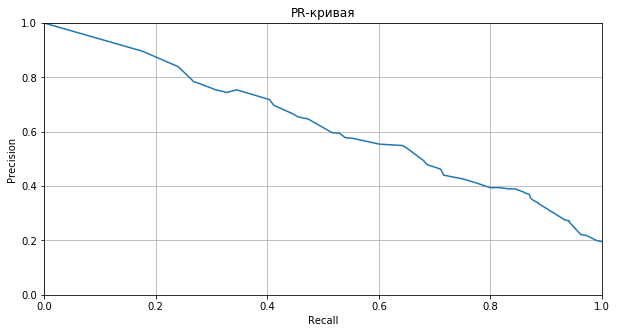

In [76]:
# построим график PR-кривой
precision_dt_down, recall_dt_down, threshold = precision_recall_curve(target_valid, probabilities_valid[:,1])
print_pr(recall_dt_down, precision_dt_down)

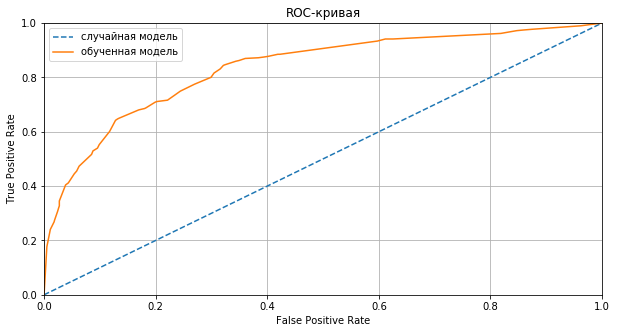

In [77]:
# построим график ROC-кривой обученной модели
fpr_dt_down, tpr_dt_down, thresholds = roc_curve(target_valid, probabilities_valid[:,1])
print_roc(fpr_dt_down, tpr_dt_down)

**Вывод**

Значение f1-меры после применения техники **downsampling** полученной модели  решающего дерева получили **0.5919**, что лучше, чем при применении техники **upsampling (0.5789)**, но превышение порога (0.59) незначительное, скорее всего, при проверке на тестовых данных, не получим необходимое значение f1-меры.

#### Модель случайного леса (downsampling)

Найдем модель с наибольшим значением f1-меры. Для этого необходимо найти наилучшие значения следующих гиперпараметров:
- 'max_depth' - максимальная глубина дерева (будем перебирать значения от 1 до 10),
- 'min_samples_split' - наименьшее количество объектов выборки, попадающих в узел решающего дерева (от 2 до 5),
- 'min_samples_leaf' - наименьшее количество объектов выборки, необходимых для создания листа решающего дерева (от 1 до 5),
- 'n_estimators' - количество деревьев в лесу (от 10 до 100 с шагом 10).

In [78]:
i = 0
forest_df_down = pd.DataFrame(columns=['n_estimators','max_depth','min_samples_split','min_samples_leaf','f1_train','f1_valid'])
best_result = 0
best_model_forest = None
best_depth = 0
best_split = 0
best_leaf = 0
best_est = 0
for depth in tqdm(range(1,11)):
    for split in range(2,6):
        for leaf in range(1,6):
            for est in range(10, 101, 10):
                model = RandomForestClassifier(
                    random_state=12345, 
                    n_estimators=est, 
                    max_depth=depth, 
                    min_samples_split=split,
                    min_samples_leaf=leaf
                )
                model.fit(features_train_down, target_train_down)
                predicted_valid = model.predict(features_valid)
                predicted_train = model.predict(features_train)
                result_train = f1_score(target_train, predicted_train)
                result_valid = f1_score(target_valid, predicted_valid)
                forest_df_down.loc[i] = np.array([est, depth, split, leaf, result_train, result_valid])
                i += 1
                if result_valid > best_result:
                    best_model_forest = model
                    best_result = result_valid
                    best_depth = depth
                    best_split = split
                    best_leaf = leaf
                    best_est = est

print(f'F1-мера наилучшей модели случайного леса на валидационной выборке {best_result} при следующих параметрах:'+'\n'+
      f'n_estimators = {best_est}'+'\n'+
      f'max_depth = {best_depth}'+'\n'+
      f'min_samples_split = {best_split}'+'\n'+
      f'min_samples_leaf = {best_leaf}')

100%|██████████| 10/10 [08:27<00:00, 50.71s/it]

F1-мера наилучшей модели случайного леса на валидационной выборке 0.6114130434782609 при следующих параметрах:
n_estimators = 40
max_depth = 9
min_samples_split = 2
min_samples_leaf = 2


In [79]:
forest_df_down.sort_values(by='f1_valid', ascending=False).head()

,n_estimators,max_depth,min_samples_split,min_samples_leaf,f1_train,f1_valid
1613,40.0,9.0,2.0,2.0,0.701344,0.611413
1713,40.0,9.0,4.0,2.0,0.701344,0.611413
1663,40.0,9.0,3.0,2.0,0.701344,0.611413
1912,30.0,10.0,4.0,2.0,0.735434,0.609418
1862,30.0,10.0,3.0,2.0,0.735434,0.609418


Посчитаем метрики полноты, точности и AUC-ROC для лучшей модели случайного леса на валидационной выборке, а также построим графики PR-кривой и ROC-кривой.

In [80]:
best_model_forest.fit(features_train_down, target_train_down)
predicted_valid = best_model_forest.predict(features_valid)
probabilities_valid = best_model_forest.predict_proba(features_valid)

print('Recall:', recall_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('AUC-ROC:', roc_auc_score(target_valid, probabilities_valid[:,1]))

Recall: 0.5754475703324808
Precision 0.6521739130434783
AUC-ROC: 0.8502413692798978


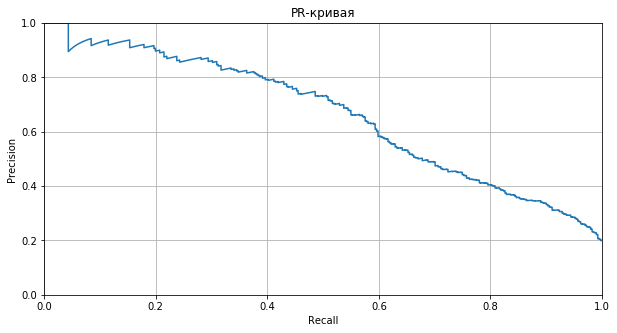

In [81]:
# построим график PR-кривой
precision_rf_down, recall_rf_down, threshold = precision_recall_curve(target_valid, probabilities_valid[:,1])
print_pr(recall_rf_down, precision_rf_down)

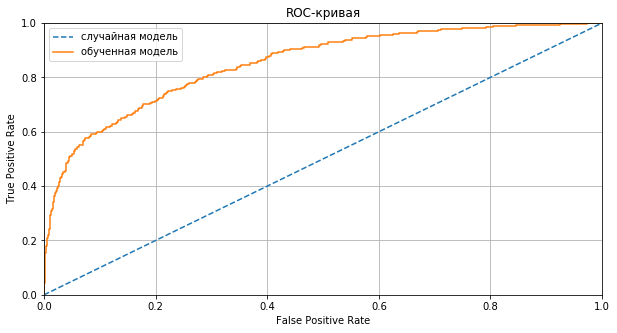

In [82]:
# построим график ROC-кривой обученной модели
fpr_rf_down, tpr_rf_down, thresholds = roc_curve(target_valid, probabilities_valid[:,1])
print_roc(fpr_rf_down, tpr_rf_down)

**Вывод**

Значение f1-меры после применения техники **downsampling** полученной модели решающего дерева получили **0.6114**, что незначительно хуже, чем при применении техники **upsampling (0.6132)**.

### Сравнение моделей и выбор лучшей

Сравним обученные различными способами модели. Сведем их метрики в таблицы и примем решение относительно того, какую из них выбрать для проверки на тестовой выборке.

**Логистическая регрессия**

In [83]:
data = [['imbalance', 0.2072, 0.5745, 0.3045, 0.7705],
        ['class_weight', 0.6829, 0.3648, 0.4755, 0.7726],
        ['upsampling', 0.4655, 0.507, 0.4853, 0.7716],
        ['downsampling', 0.4731, 0.4947, 0.4836, 0.7721]]
columns = ['method', 'Recall', 'Precision', 'F1-score', 'AUC-ROC']
logistic_regression = pd.DataFrame(data=data, columns=columns)
logistic_regression.sort_values(by='F1-score', ascending=False)

,method,Recall,Precision,F1-score,AUC-ROC
2,upsampling,0.4655,0.5070,0.4853,0.7716
3,downsampling,0.4731,0.4947,0.4836,0.7721
1,class_weight,0.6829,0.3648,0.4755,0.7726
0,imbalance,0.2072,0.5745,0.3045,0.7705


Ни одна модель, обученная методом логистической регрессии, не достигла целевого показателя f1-меры в 0.59. По этой причине, для дальнейшего рассмотрения данные модели не подходят. 

**Решающее дерево**

In [84]:
data = [['imbalance', 0.4629, 0.7298, 0.5665, 0.828],
        ['class_weight', 0.7136, 0.4635, 0.5619, 0.8178],
        ['upsampling', 0.5627, 0.5962, 0.5789, 0.8262],
        ['downsampling', 0.6419, 0.5492, 0.592, 0.8332]]
columns = ['method', 'Recall', 'Precision', 'F1-score', 'AUC-ROC']
decision_tree = pd.DataFrame(data=data, columns=columns)
decision_tree.sort_values(by='F1-score', ascending=False)

,method,Recall,Precision,F1-score,AUC-ROC
3,downsampling,0.6419,0.5492,0.5920,0.8332
2,upsampling,0.5627,0.5962,0.5789,0.8262
0,imbalance,0.4629,0.7298,0.5665,0.8280
1,class_weight,0.7136,0.4635,0.5619,0.8178


Из четырех моделей только одна модель решающего дерева преодолела необходимый порог f1-меры в 0.59. Результат **0.5920** показала модель, которая обучалась на данных, преобразованных техникой 'downsampling'. 

Гиперпараметры данной модели: 
- max_depth=7, 
- min_samples_split=2, 
- min_samples_leaf=7

In [85]:
%%time
model_tree_down = DecisionTreeClassifier(
                random_state=12345, 
                max_depth=7, 
                min_samples_split=2, 
                min_samples_leaf=7
            )
model_tree_down.fit(features_train_down, target_train_down)
predicted_valid = model_tree_down.predict(features_valid)
result_valid = f1_score(target_valid, predicted_valid)
result_valid

CPU times: user 18 ms, sys: 6 µs, total: 18 ms
Wall time: 16.8 ms


0.5919811320754716

**Случайный лес**

In [86]:
data = [['imbalance', 0.4425, 0.7936, 0.5681, 0.8507],
        ['class_weight', 0.6496, 0.5721, 0.6084, 0.8534],
        ['upsampling', 0.5575, 0.6813, 0.6132, 0.8519],
        ['downsampling', 0.5754, 0.6522, 0.6114, 0.8502]]
columns = ['method', 'Recall', 'Precision', 'F1-score', 'AUC-ROC']
decision_tree = pd.DataFrame(data=data, columns=columns)
decision_tree.sort_values(by='F1-score', ascending=False)

,method,Recall,Precision,F1-score,AUC-ROC
2,upsampling,0.5575,0.6813,0.6132,0.8519
3,downsampling,0.5754,0.6522,0.6114,0.8502
1,class_weight,0.6496,0.5721,0.6084,0.8534
0,imbalance,0.4425,0.7936,0.5681,0.8507


Из четырех моделей случайного леса 3 модели превысили необходимый порог f1-меры в 0.59. 
- Результат **0.6132** показала модель, которая обучалась на данных, преобразованных техникой **'upsampling'** (ее гиперпараметры: n_estimators=70, max_depth=9, min_samples_split=2, min_samples_leaf=5), 
- **0.6114** - модель, которая обучалась на данных, преобразованных техникой **'downsampling'** (ее гиперпараметры: n_estimators=40, max_depth=9, min_samples_split=2, min_samples_leaf=2)
- **0.6132** - модель, которая обучалась с выставленным параметром **class_weight='balanced'** (ее гиперпараметры: n_estimators=80, max_depth=9, min_samples_split=2, min_samples_leaf=3).

In [87]:
%%time
model_forest_up = RandomForestClassifier(
                    random_state=12345, 
                    n_estimators=70, 
                    max_depth=9, 
                    min_samples_split=2,
                    min_samples_leaf=5,
                )
model_forest_up.fit(features_train_up, target_train_up)
predicted_valid = model_forest_up.predict(features_valid)
result_valid = f1_score(target_valid, predicted_valid)
result_valid

CPU times: user 667 ms, sys: 3.99 ms, total: 671 ms
Wall time: 694 ms


0.6132208157524615

In [88]:
%%time
model_forest_down = RandomForestClassifier(
                    random_state=12345, 
                    n_estimators=40, 
                    max_depth=9, 
                    min_samples_split=2,
                    min_samples_leaf=2,
                )
model_forest_down.fit(features_train_down, target_train_down)
predicted_valid = model_forest_down.predict(features_valid)
result_valid = f1_score(target_valid, predicted_valid)
result_valid

CPU times: user 199 ms, sys: 11 µs, total: 199 ms
Wall time: 213 ms


0.6114130434782609

In [89]:
%%time
model_forest_bal = RandomForestClassifier(
                    random_state=12345, 
                    n_estimators=80, 
                    max_depth=9, 
                    min_samples_split=2,
                    min_samples_leaf=3,
                    class_weight='balanced'
                )
model_forest_bal.fit(features_train, target_train)
predicted_valid = model_forest_bal.predict(features_valid)
result_valid = f1_score(target_valid, predicted_valid)
result_valid

CPU times: user 544 ms, sys: 8.02 ms, total: 552 ms
Wall time: 562 ms


0.6083832335329341

**Вывод**

Выбрали 4 модели, которые удовлетворяют требуемому уровню f1-меры. 

## Тестирование модели

В предыдущем шаге мы выделили 4 модели, которые могут выдать требуемое значение f1-меры для тестовой выборки. Проверим их.

**Модель 1**

In [90]:
predicted_test = model_tree_down.predict(features_test)
result_test = f1_score(target_test, predicted_test)
print('F1:', result_test)

F1: 0.6252771618625276


**Модель 2**

In [91]:
predicted_test = model_forest_up.predict(features_test)
result_test = f1_score(target_test, predicted_test)
print('F1:', result_test)

F1: 0.620599739243807


**Модель 3**

In [92]:
predicted_test = model_forest_down.predict(features_test)
result_test = f1_score(target_test, predicted_test)
print('F1:', result_test)

F1: 0.6236024844720496


**Модель 4**

In [93]:
predicted_test = model_forest_bal.predict(features_test)
result_test = f1_score(target_test, predicted_test)
print('F1:', result_test)

F1: 0.6514161220043573


**Вывод**

Все модели показали значение метрики f1-меры от 0.6205 до 0.6514. Данные значения удовлетворяет заданному в условии порогу (не менее 0.59). Какую выбрать? 
1. Если исходить из максимального значения f1, то модель случайного леса с выставленным параметром class_weight='balanced'(**Модель 4**);

Её гиперпараметры: 
   - n_estimators=80, 
   - max_depth=9, 
   - min_samples_split=2,
   - min_samples_leaf=3,
   - class_weight='balanced'.


2. Если требуется наиболее быстрая модель, то следует выбрать модель решающего дерева, обученную на данных, преобразованных техникой 'downsampling'(**Модель 1**);

Её гиперпараметры: 
- max_depth=7, 
- min_samples_split=2, 
- min_samples_leaf=7.